In [339]:
#Loading necessary libraries

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
#To Load the dataset in Python environment

In [342]:
data=pd.read_csv('/content/train_loan (1).csv')

In [343]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [345]:
#finding the shape of dataset
data.shape

(614, 13)

Data cleaning and filling missing values

In [346]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [347]:
data['Gender'].nunique()

2

In [348]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [349]:
#filling the missing values of categorical features

In [350]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [351]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [352]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

To strip '+' from 'dependents feature' of the dataset

In [353]:
data['Dependents']=data['Dependents'].str.strip('+')

Explicitly changing the 'dependent' feature (object) to float datatype

In [354]:
data['Dependents']=data['Dependents'].astype('float64')

In [355]:
data['Married']=data['Married'].fillna(data['Married'].mode()[0])

In [356]:
#finding information of the dataset

In [357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [358]:
#finding the number of null values

In [359]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [360]:
#filling missing values of numeric features using simple imputer

In [361]:
num=['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']

In [362]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data[num]=imputer.fit_transform(data[num])

In [363]:
# checking all the null values are handled

In [364]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [365]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [366]:
#statistical measure of dataset

In [367]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [368]:
#Outlier Detection

In [369]:
def outliers(x):
    plt.figure(figsize = [9,2])
    sns.boxplot(x)
    plt.show()

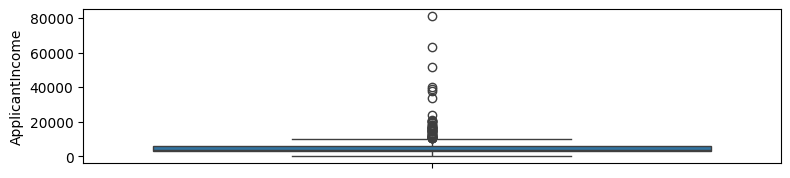

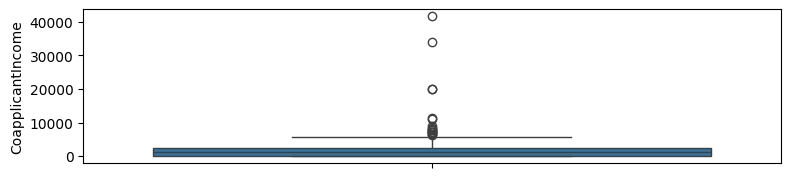

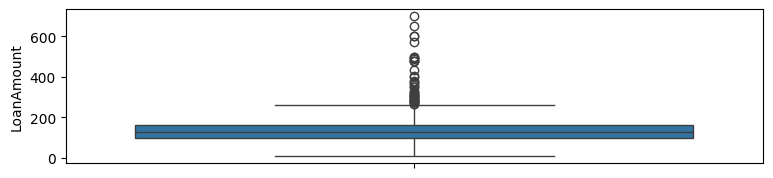

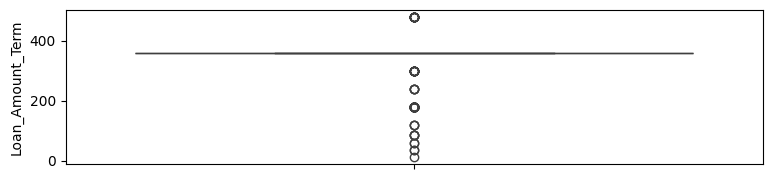

In [370]:
outliers(data.ApplicantIncome)
outliers(data.CoapplicantIncome)
outliers(data.LoanAmount)
outliers(data.Loan_Amount_Term)

Assuming all ouliers are true values ,since each person has different income

In [371]:
#LABEL ENCODING

In [372]:
x=data.drop(['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']

In [373]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['Married'] = le.fit_transform(x['Married'])
x['Self_Employed'] = le.fit_transform(x['Self_Employed'])

In [374]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,0,0.0,Graduate,0,5849,0.0,128.0,360.0,1.0,Urban
1,Male,1,1.0,Graduate,0,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,1,0.0,Graduate,1,3000,0.0,66.0,360.0,1.0,Urban
3,Male,1,0.0,Not Graduate,0,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,0,0.0,Graduate,0,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,0,0.0,Graduate,0,2900,0.0,71.0,360.0,1.0,Rural
610,Male,1,3.0,Graduate,0,4106,0.0,40.0,180.0,1.0,Rural
611,Male,1,1.0,Graduate,0,8072,240.0,253.0,360.0,1.0,Urban
612,Male,1,2.0,Graduate,0,7583,0.0,187.0,360.0,1.0,Urban


In [375]:
#manual encoding
x['Education']=x['Education'].map({'Graduate':1,'Not Graduate':0})
x['Gender']=x['Gender'].map({'Female':1,'Male':0})

In [376]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,Urban
1,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,Rural
2,0,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,Urban
3,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,Urban
4,0,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,Rural
610,0,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,Rural
611,0,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,Urban
612,0,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,Urban


In [377]:
#One hot encoding
x=pd.get_dummies(x)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0.0,1,0,5849,0.0,128.0,360.0,1.0,0,0,1
1,0,1,1.0,1,0,4583,1508.0,128.0,360.0,1.0,1,0,0
2,0,1,0.0,1,1,3000,0.0,66.0,360.0,1.0,0,0,1
3,0,1,0.0,0,0,2583,2358.0,120.0,360.0,1.0,0,0,1
4,0,0,0.0,1,0,6000,0.0,141.0,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0.0,1,0,2900,0.0,71.0,360.0,1.0,1,0,0
610,0,1,3.0,1,0,4106,0.0,40.0,180.0,1.0,1,0,0
611,0,1,1.0,1,0,8072,240.0,253.0,360.0,1.0,0,0,1
612,0,1,2.0,1,0,7583,0.0,187.0,360.0,1.0,0,0,1


In [378]:
#Applying Standard Scaling

In [379]:
#from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

In [380]:
#x.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']] =sc.fit_transform(x[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

In [381]:
#x

In [382]:
#splitting the dataset into training and testing set

In [383]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Decision tree classification

In [384]:
# Fitting Decision Tree Classification(Information gain) to the Training set

In [385]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(criterion='entropy')

In [386]:
clf_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [387]:
# Predicting the Test set results

In [388]:
y_tree_pred=clf_tree.predict(x_test)

In [389]:
from sklearn.metrics import accuracy_score

In [390]:
# Measuring Accuracy
accuracy_score(y_test,y_tree_pred)

0.7479674796747967

In [391]:
# Fitting Decision Tree Classification(Gini Index) to the Training set

In [392]:
clf_gini_tree=DecisionTreeClassifier(criterion='gini')

In [393]:
clf_gini_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [394]:
# Predicting the Test set results

In [395]:
y_gini_pred=clf_gini_tree.predict(x_test)

In [396]:
# Measuring Accuracy
accuracy_score(y_test,y_gini_pred)

0.7479674796747967

In [397]:
#Decision Tree

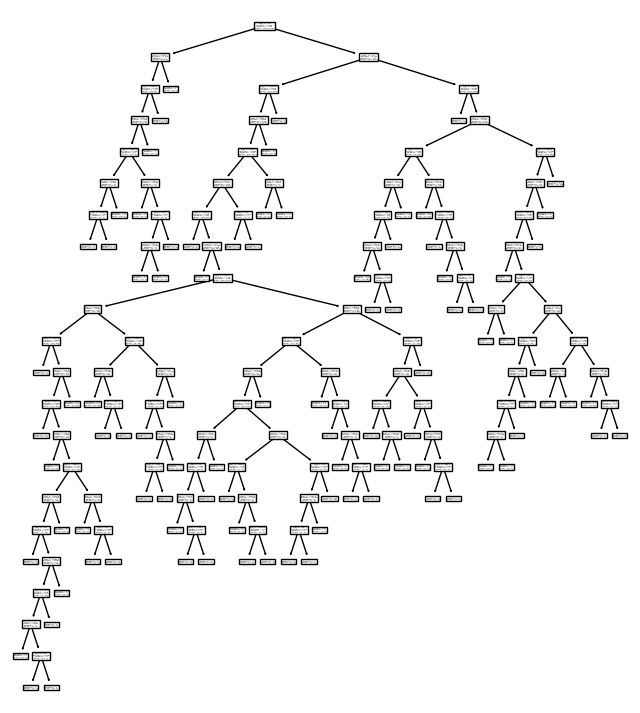

In [398]:
from sklearn import tree
plt.figure(figsize=(8,9))
tree.plot_tree(clf_tree)
plt.show()

Ensemble Learning Techniques

In [399]:
#Bagging Method
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=50)

In [400]:
# Fitting Random Forest Classification to the Training set

In [401]:
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [402]:
#Predicting the Test set results

In [403]:
y_clf_pred=clf.predict(x_test)

In [404]:
from sklearn.metrics import accuracy_score

In [405]:
# Measuring Accuracy
accuracy_score(y_test,y_clf_pred)

0.7723577235772358

In [406]:
#Boosting Method
from sklearn.ensemble import AdaBoostClassifier

In [407]:
# Fitting AdaBoost Classification to the Training set

In [408]:
ad_clf=AdaBoostClassifier(n_estimators=20)

In [409]:
ad_clf.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [410]:
#Predicting the Test set results

In [411]:
y_ad_clf_pred=ad_clf.predict(x_test)

In [412]:
# Measuring Accuracy
accuracy_score(y_test,y_ad_clf_pred)

0.8048780487804879

Feature scaling

In [413]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [414]:
#Bagging method after scaling

In [415]:
from sklearn.ensemble import RandomForestClassifier
clf_scaled=RandomForestClassifier()

In [416]:
clf_scaled=RandomForestClassifier(n_estimators=50)

In [417]:
# Fitting AdaBoost Classification to the Training set

In [418]:
clf_scaled.fit(x_train_scaled,y_train)

RandomForestClassifier(n_estimators=50)

In [419]:
#Predicting the testing set

In [420]:
y_scaled_clf_pred=clf_scaled.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [421]:
accuracy_score(y_test,y_scaled_clf_pred)

0.4065040650406504

In [422]:
#Boosting method after scaling

In [423]:
from sklearn.ensemble import AdaBoostClassifier
ad_scaled_clf=AdaBoostClassifier()

In [424]:
ad_scaled_clf=AdaBoostClassifier(n_estimators=20)

In [425]:
# Fitting AdaBoost Classification to the Training set

In [426]:
ad_scaled_clf.fit(x_train_scaled,y_train)

AdaBoostClassifier(n_estimators=20)

In [427]:
#predicting the test set

In [428]:
y_scaled_ad_pred=ad_scaled_clf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


In [429]:
accuracy_score(y_test,y_scaled_ad_pred)

0.3983739837398374

using ensemble technique,
accuracy score of bagging method (without scaling)=76%

accuracy score of boosting method (without scaling)=80%

accuracy score of bagging method (with scaling)=44%

accuracy score of boosting method (with scaling)=39%